Apache Arrow defines a language-independent columnar memory format for flat and hierarchical data, organized for efficient analytic operations on modern hardware like CPUs and GPUs.

The Arrow memory format also supports zero-copy reads for lightning-fast data access without serialization overhead.

in-memory columnar format, a standardized, language-agnostic specification for representing structured, table-like datasets in-memory. 

This data format has a rich data type system (included nested and user-defined data types) designed to support the needs of analytic database systems, data frame libraries, and more.

Libraries are available for C, C++, C#, Go, Java, JavaScript, Julia, MATLAB, Python, R, Ruby, and Rust.

from: https://arrow.apache.org/

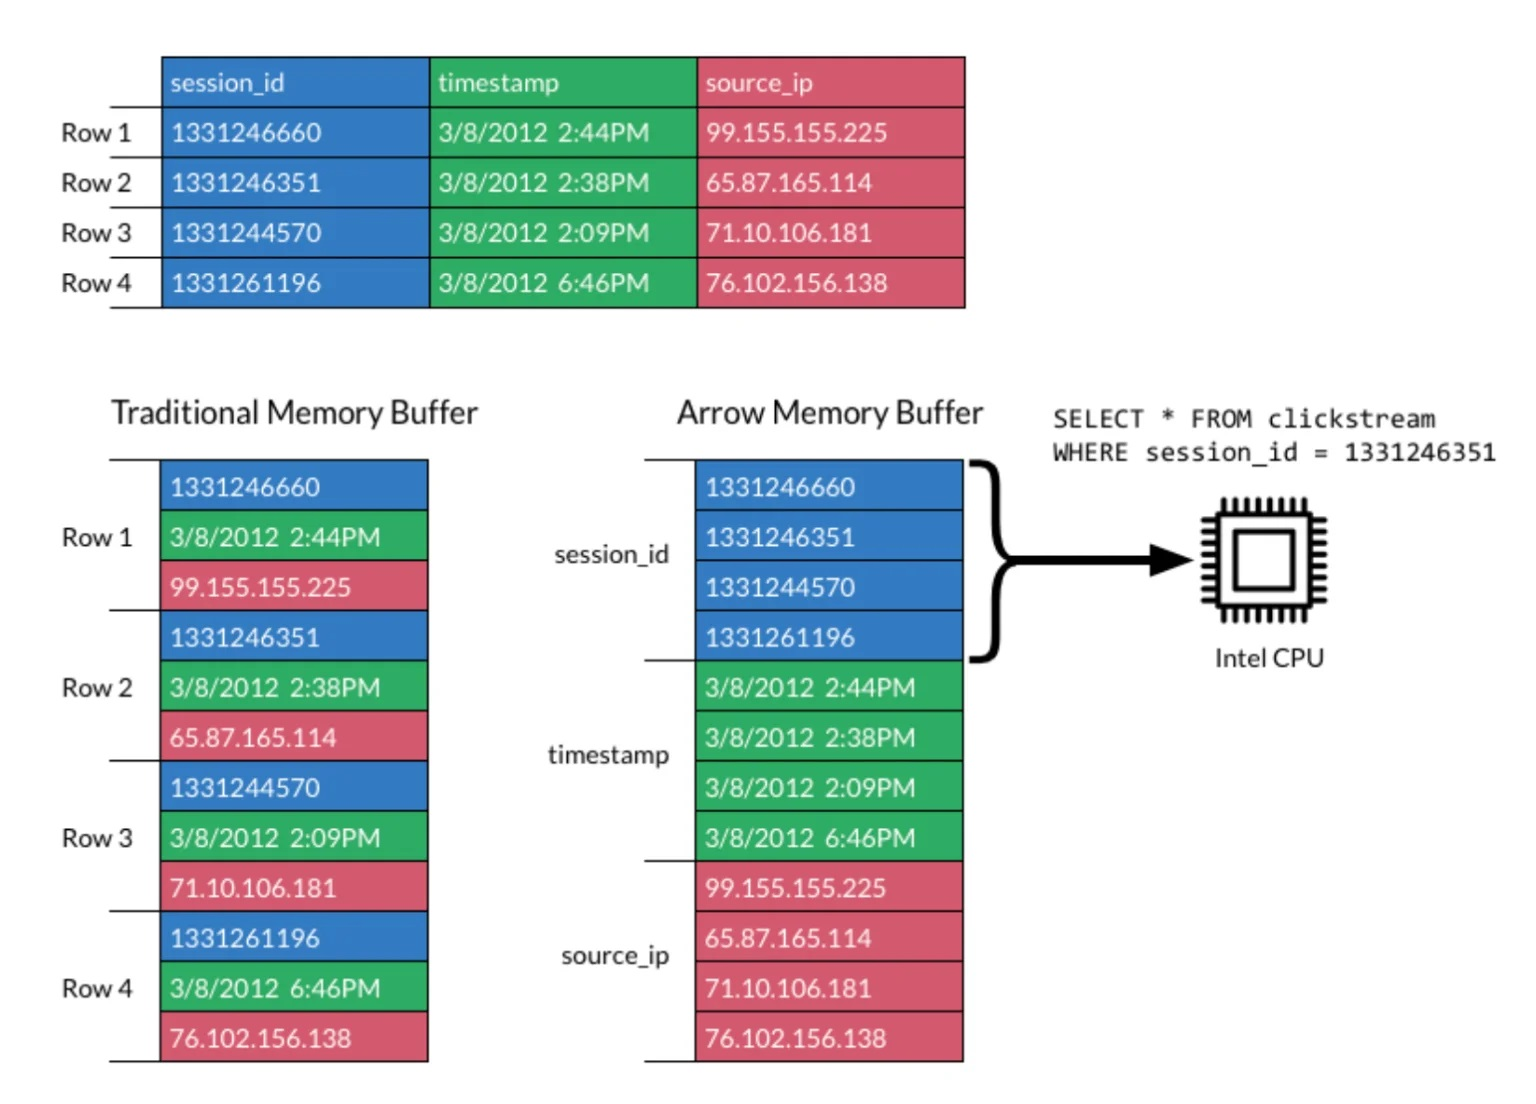

In [ ]:
The Apache Arrow format allows computational routines and execution engines to maximize their 
efficiency when scanning and iterating large chunks of data. 

In particular, the contiguous columnar layout enables vectorization
using the latest SIMD (Single Instruction, Multiple Data) operations included in modern processors.

Ultrafast pandas DataFrame loading from Apache Arrow
Wes McKinney (@wesmckinn)
April 2, 2020

The pyarrow library is able to construct a pandas.DataFrame faster than using pandas.DataFrame directly in some cases. Let’s have a look.

First, I make a dict of 100 NumPy arrays of float64 type, a little under 800 megabytes of data:

In [16]:
import pandas as pd
import pyarrow as pa
import numpy as np

num_rows = 1_000_000
num_columns = 100
arr = np.random.randn(num_rows)
dict_of_numpy_arrays = {
    'f{}'.format(i): arr
    for i in range(num_columns)
}

In [17]:
import platform
platform.processor()

'AMD64 Family 23 Model 113 Stepping 0, AuthenticAMD'

In [18]:
!pip install py-cpuinfo

In [19]:
import cpuinfo

In [20]:
if __name__ == '__main__':
    from cpuinfo import get_cpu_info

    for key, value in get_cpu_info().items():
        print("{0}: {1}".format(key, value))

python_version: 3.8.5.final.0 (64 bit)
cpuinfo_version: [9, 0, 0]
cpuinfo_version_string: 9.0.0
arch: X86_64
bits: 64
count: 12
arch_string_raw: AMD64
vendor_id_raw: AuthenticAMD
brand_raw: AMD Ryzen 5 3600 6-Core Processor
hz_actual_friendly: 3.5930 GHz
hz_actual: [3593000000, 0]
l2_cache_size: 3145728
model: 113
family: 23
l3_cache_size: 33554432
hz_advertised_friendly: 3.5930 GHz
hz_advertised: [3593000000, 0]
flags: ['3dnow', '3dnowprefetch', 'abm', 'adx', 'aes', 'apic', 'avx', 'avx2', 'bmi1', 'bmi2', 'clflush', 'clflushopt', 'clwb', 'cmov', 'cmp_legacy', 'cr8_legacy', 'cx16', 'cx8', 'de', 'dts', 'f16c', 'fma', 'fpu', 'fxsr', 'ht', 'hypervisor', 'ia64', 'lahf_lm', 'lm', 'mca', 'mce', 'misalignsse', 'mmx', 'movbe', 'msr', 'mtrr', 'osvw', 'osxsave', 'pae', 'pat', 'pclmulqdq', 'pge', 'pni', 'popcnt', 'pqe', 'pqm', 'pse', 'pse36', 'rdpid', 'rdrnd', 'rdseed', 'sep', 'sepamd', 'serial', 'sha', 'smap', 'smep', 'ss', 'sse', 'sse2', 'sse4_1', 'sse4_2', 'sse4a', 'ssse3', 'tm', 'topoext', 'ts

https://github.com/workhorsy/py-cpuinfo

In [21]:
timeit df = pd.DataFrame(dict_of_numpy_arrays)

145 ms ± 1.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [22]:
 timeit df = pa.table(dict_of_numpy_arrays).to_pandas()

121 ms ± 1.07 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [23]:
 timeit df = pa.table(dict_of_numpy_arrays).to_pandas(use_threads=False)

543 ms ± 4.13 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Polars library

Polars is a library that can be used in place of Pandas that uses Arrow underneath

https://www.datacamp.com/tutorial/high-performance-data-manipulation-in-python-pandas2-vs-polars

https://www.datacamp.com/datalab/w/31eff267-9df9-4cfe-b513-df888e0c7151/edit

In [ ]:
### What can you do with Arrow

https://arrow.apache.org/cookbook/py/index.html

Koalas. A pandas API built on top of PySpark. If you use Spark, you should consider this tool.

Vaex. A pandas API for out-of-memory computation, great for analyzing big tabular data at a billion rows per second.

Modin. A pandas API for parallel programming, based on Dask or Ray frameworks for big data projects. If you use Dask or Ray, Modin is a great resource.

cuDF. Part of the RAPIDS project, cuDF is a pandas-like API for GPU computation that relies on NVIDIA GPUs or other parts of RAPIDS to perform high-speed data manipulation.

### Using CUDA coprocessors

https://arrow.apache.org/docs/python/integration/cuda.html